In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [3]:
df_suicide = pd.read_csv('master.csv')

In [375]:
df=df_suicide.copy()


In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

### DataTypes

In [7]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

### Data Frame Summary

In [8]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [9]:
df.describe(include=['O'])

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Mauritius,male,15-24 years,Albania1987,"2,156,624,900",Generation X
freq,382,13910,4642,12,12,6408


### Null Values

In [10]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

#### Observation
##### Dropping 'HDI for year' column due to large number of missing values, and dropping country-year because we have separate columns for both

In [376]:
df.drop(['HDI for year','country-year'], axis=1, inplace=True)

In [377]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


### Shape

In [97]:
df.shape

(27820, 12)

<br>

## Gender vs Suicides Number

In [11]:
a = df.groupby('sex')['suicides_no'].sum().reset_index()
a

,sex,suicides_no
0,female,1559510
1,male,5188910


<AxesSubplot:xlabel='year', ylabel='suicides_no'>

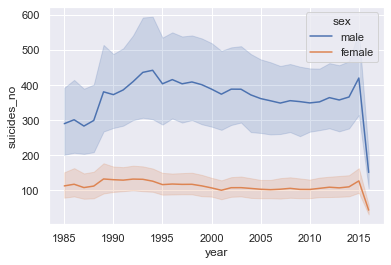

In [12]:
sns.lineplot(data=df, x='year', y='suicides_no', hue='sex')

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

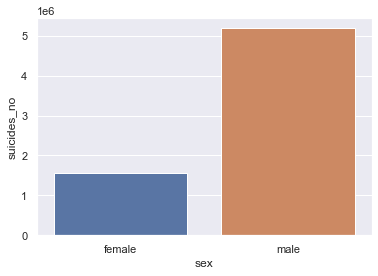

In [13]:
sns.barplot(data=a, x='sex', y='suicides_no')

In [381]:
df['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

#### Observation: 
##### Large proportion of the suicides were done by males from 1987 to 2016 

<br>

## Country vs Suicides Number

In [33]:
df_sorted = df.sort_values('suicides_no',ascending=False)

<AxesSubplot:xlabel='suicides_no', ylabel='country'>

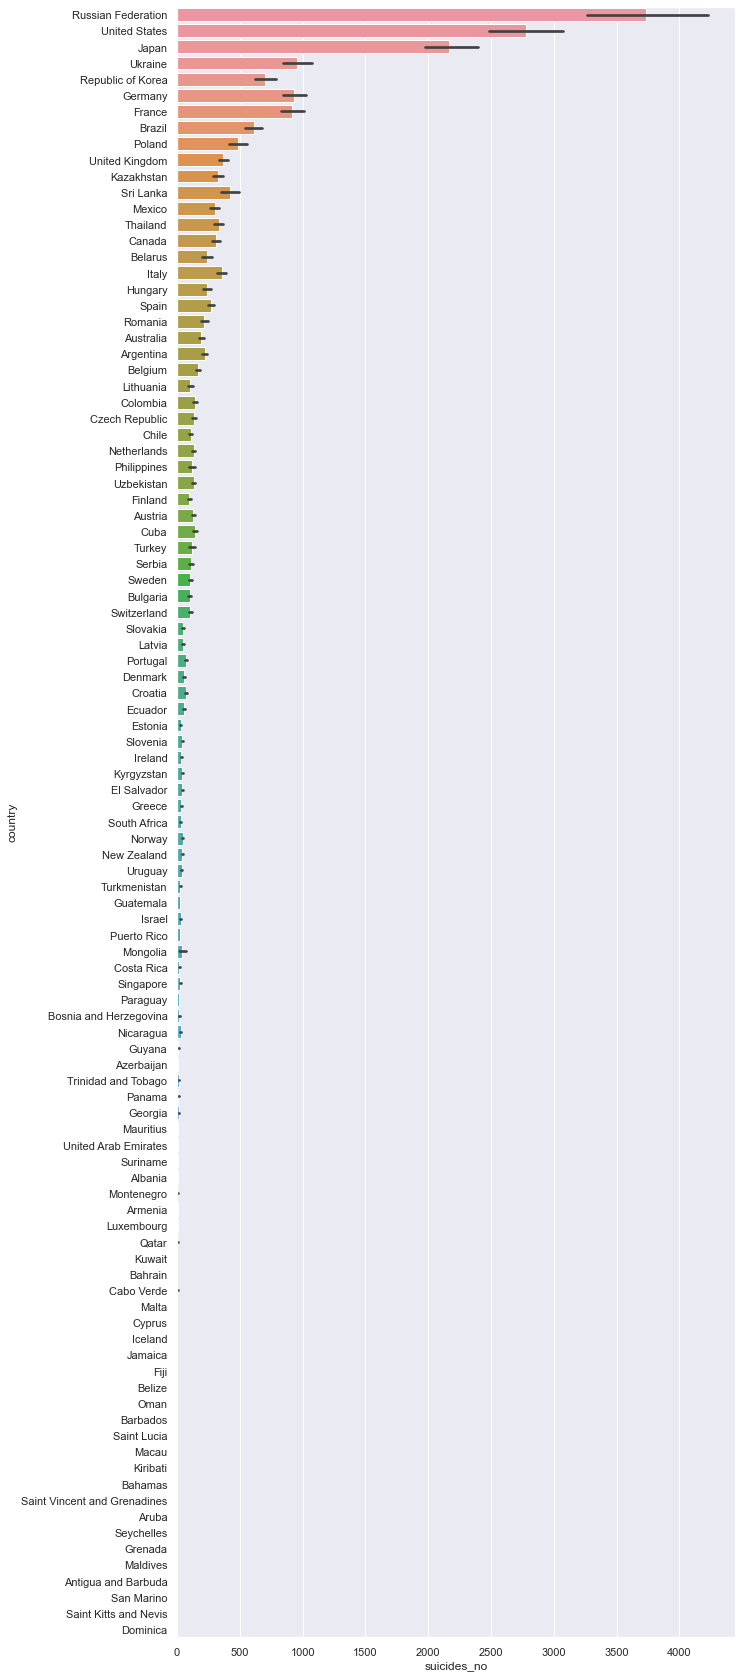

In [95]:
plt.figure(figsize=(10,30))
sns.barplot(data=df_sorted, y='country', x='suicides_no')

In [39]:
temp = df.groupby(['country','year'])['suicides_no'].sum().reset_index(name='Total Suicides').sort_values('Total Suicides', ascending=False)
temp

,country,year,Total Suicides
1752,Russian Federation,1994,61420
1753,Russian Federation,1995,60548
1754,Russian Federation,1996,57511
1757,Russian Federation,1999,56974
1759,Russian Federation,2001,56958
...,...,...,...
20,Albania,2009,0
1420,Montenegro,2006,0
22,Antigua and Barbuda,1985,0
23,Antigua and Barbuda,1986,0


#### Getting the visual output countries having suicides > 10,000

In [40]:
newtemp=temp[temp['Total Suicides']>10000]

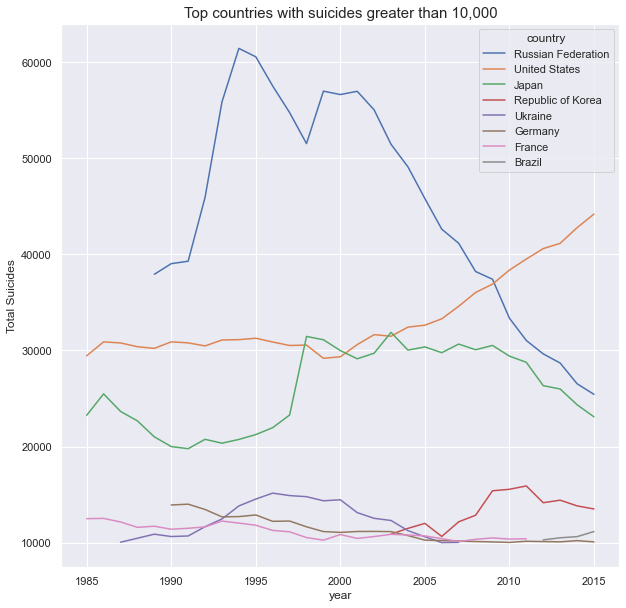

In [395]:
plt.figure(figsize=(10,10))
sns.lineplot(x='year', y='Total Suicides', data=newtemp, hue='country', markers="o")
plt.title('Top countries with suicides greater than 10,000',size=15)
plt.show()

#### Top 10 highest suicide countries

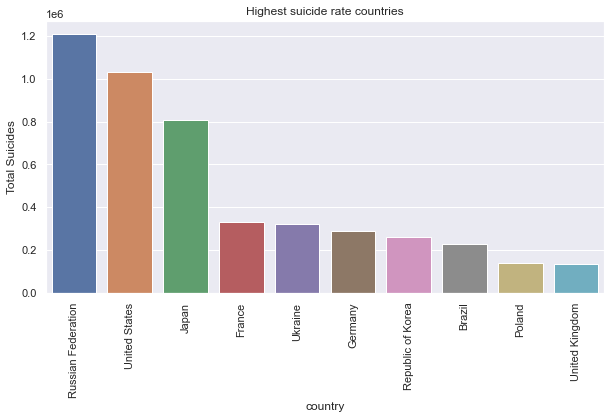

In [389]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
sns.barplot(x='country',  y='Total Suicides', data = df.groupby('country')['suicides_no'].sum().reset_index(name='Total Suicides').sort_values('Total Suicides',ascending=False).head(10))
plt.title('Highest suicide rate countries')
plt.show()

#### Lowest Suicide Rate Countries

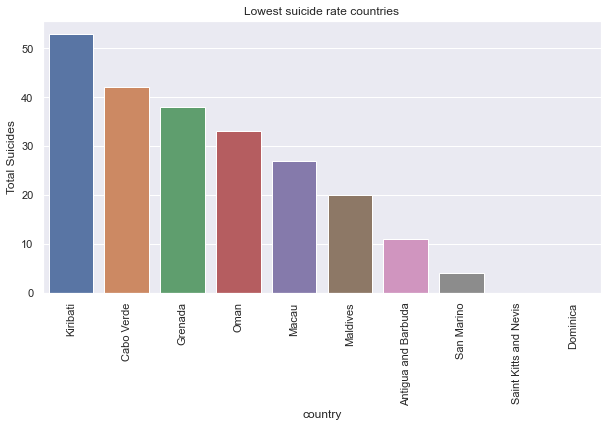

In [390]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
sns.barplot(x='country',  y='Total Suicides', data = df.groupby('country')['suicides_no'].sum().reset_index(name='Total Suicides').sort_values('Total Suicides',ascending=False).tail(10))
plt.title('Lowest suicide rate countries')
plt.show()

#### Observation
##### Russian Federation stands at number 1 with highest number of suicides over the years followed by United States and Japan

<br>

## Country vs Gender vs Suicide Number 

In [118]:
CGS = df.groupby(['country','sex'])['suicides_no'].sum().reset_index(name='Total Suicides').sort_values('Total Suicides',ascending=False)
CGS

,country,sex,Total Suicides
151,Russian Federation,male,995412
197,United States,male,820216
93,Japan,male,555272
191,Ukraine,male,258573
92,Japan,female,251630
...,...,...,...
152,Saint Kitts and Nevis,female,0
54,Dominica,female,0
153,Saint Kitts and Nevis,male,0
130,Oman,female,0


In [123]:
Male_CGS = CGS[CGS['sex']=='male']
Female_CGS = CGS[CGS['sex']=='female']

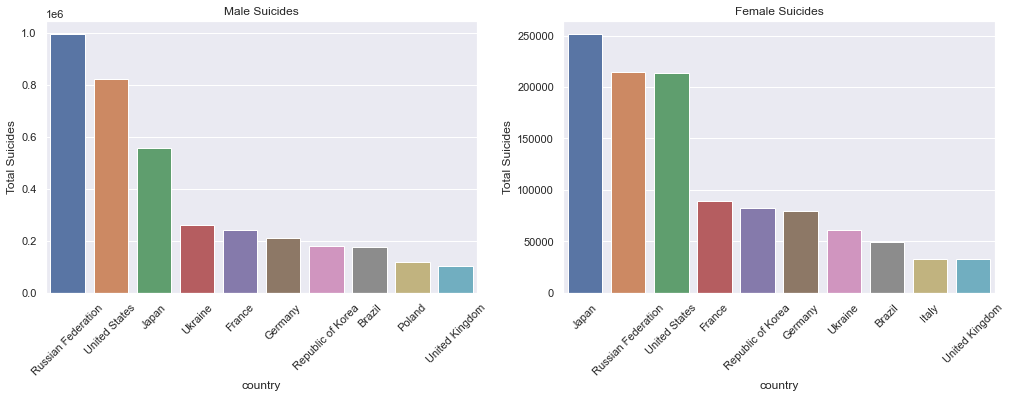

In [397]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.title('Male Suicides')
plt.xticks(rotation = 45)
sns.barplot(x='country', y='Total Suicides', data=Male_CGS.head(10))
plt.subplot(1,2,2)
plt.title('Female Suicides')
plt.xticks(rotation = 45)
sns.barplot(x='country', y='Total Suicides', data=Female_CGS.head(10))
plt.show()

#### Observation
##### Russian Federation stands at number 1 with highest male suicides whereas Japan stands at number 1 with highest female suicides over the years

<br>

## Year vs Suicide Number

In [82]:
q = df.groupby('year')['suicides_no'].sum().reset_index()
q

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244
5,1990,193361
6,1991,198020
7,1992,211473
8,1993,221565
9,1994,232063


<AxesSubplot:xlabel='year', ylabel='suicides_no'>

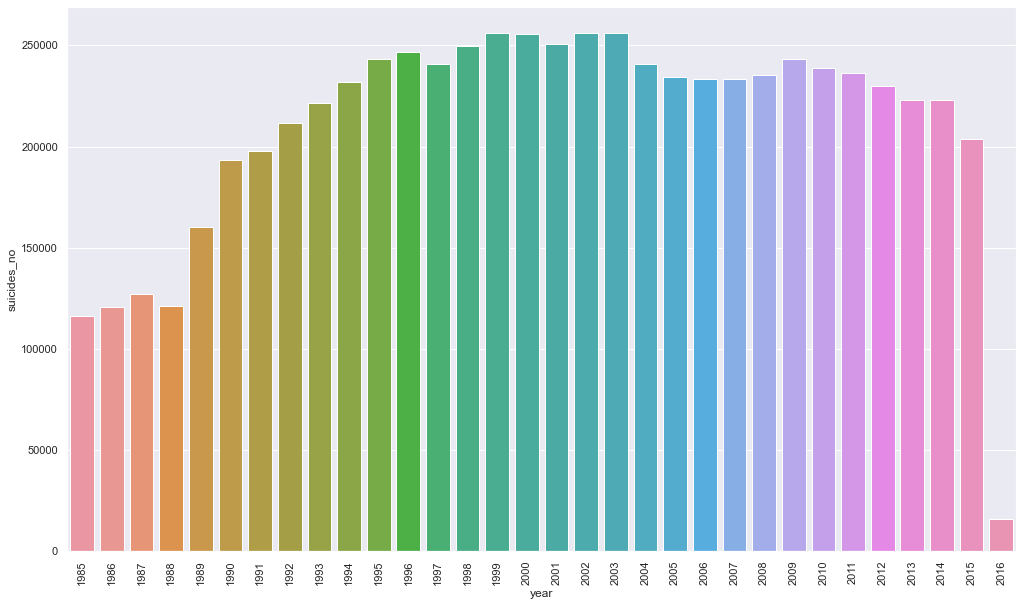

In [91]:
plt.figure(figsize=(17,10))
plt.xticks(rotation = 90)
sns.barplot(x='year', y='suicides_no' ,data=q)

#### Observation:
##### Suicides started increasing after the year 1990 and decreased at year 2016

<br>


### Why the Suicide rates wer decreased in 2016?

In [403]:
df_2015 = df[df['year']==2015]
df_2016 = df[df['year']==2016]

In [418]:
df_2015['sex'].value_counts()

female    372
male      372
Name: sex, dtype: int64

In [434]:
op_2015=df_2015.groupby(['sex','country'])['suicides_no','population','gdp_per_capita ($)'].sum().reset_index().sort_values('suicides_no', ascending=False)
op_2016=df_2016.groupby(['sex','country'])['suicides_no','population','gdp_per_capita ($)'].sum().reset_index().sort_values('suicides_no', ascending=False)
op_2016.head(10)

C:\Users\HUZAIF~1\AppData\Local\Temp/ipykernel_22784/396356687.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  op_2015=df_2015.groupby(['sex','country'])['suicides_no','population','gdp_per_capita ($)'].sum().reset_index().sort_values('suicides_no', ascending=False)
C:\Users\HUZAIF~1\AppData\Local\Temp/ipykernel_22784/396356687.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  op_2016=df_2016.groupby(['sex','country'])['suicides_no','population','gdp_per_capita ($)'].sum().reset_index().sort_values('suicides_no', ascending=False)


,sex,country,suicides_no,population,gdp_per_capita ($)
31,male,Thailand,3275,25945316,33565
29,male,Romania,1643,8054969,50100
22,male,Hungary,1315,3951076,67240
27,male,Netherlands,1273,7017286,240540
20,male,Czech Republic,1060,4354464,97525
17,male,Austria,906,3649785,234880
15,female,Thailand,842,27496685,33565
30,male,Sweden,782,4041436,277970
24,male,Lithuania,693,1104112,78710
11,female,Netherlands,613,7222268,240540


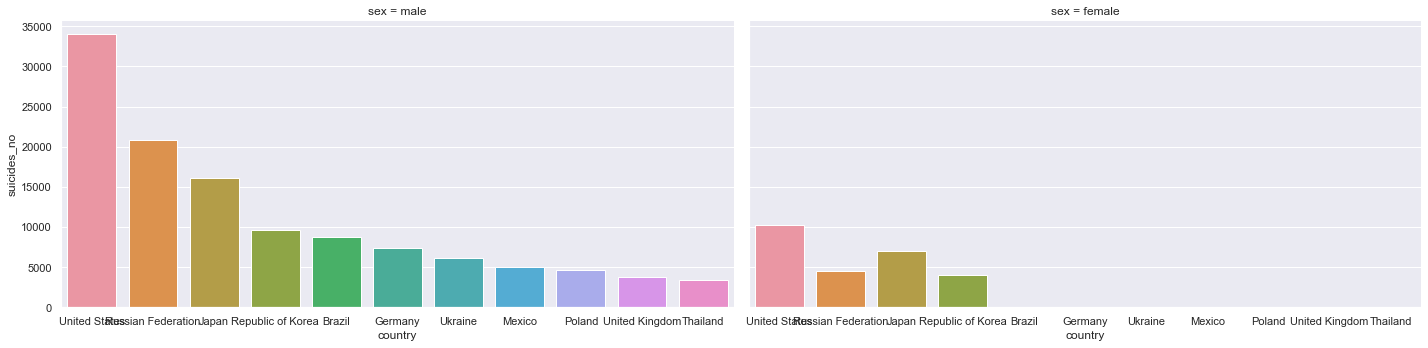

In [480]:
# For year 2015
sns.catplot(data=op_2015.head(15), x='country', y='suicides_no', col='sex', kind='bar',aspect=2)

<Figure size 2880x720 with 0 Axes>

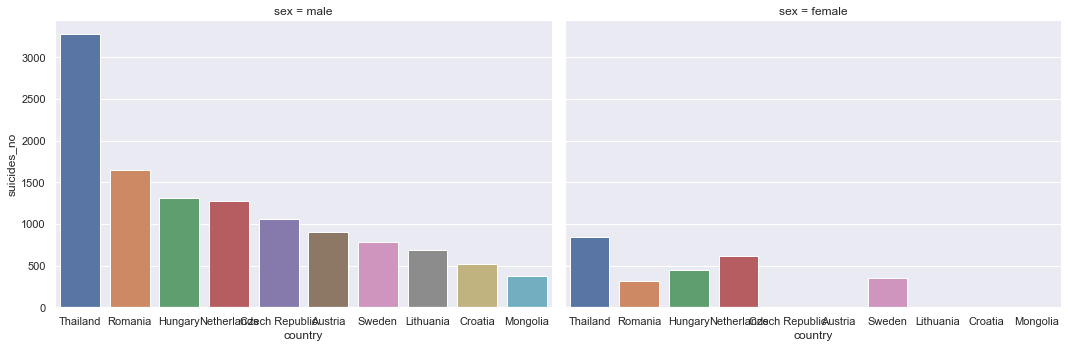

In [478]:
# For year 2016
sns.catplot(data=op_2016.head(15), x='country', y='suicides_no', col='sex', kind='bar',aspect=1.5)

#### Observation:
##### We already know that suicide rates decreased relatively high in 2016 which were already high in 2015. Further analysis shows that the female suicides decreased a lot in 2016
##### Russian Federation, USA and Japan also had very low suicide rates for both male and female in 2016

<br>

## Year vs Gender vs Suicide Number

In [90]:
s = df.groupby(['year','sex'])['suicides_no'].sum().reset_index()
s

,year,sex,suicides_no
0,1985,female,32479
1,1985,male,83584
2,1986,female,33852
3,1986,male,86818
4,1987,female,35006
...,...,...,...
59,2014,male,171428
60,2015,female,47248
61,2015,male,156392
62,2016,female,3504


<AxesSubplot:xlabel='year', ylabel='suicides_no'>

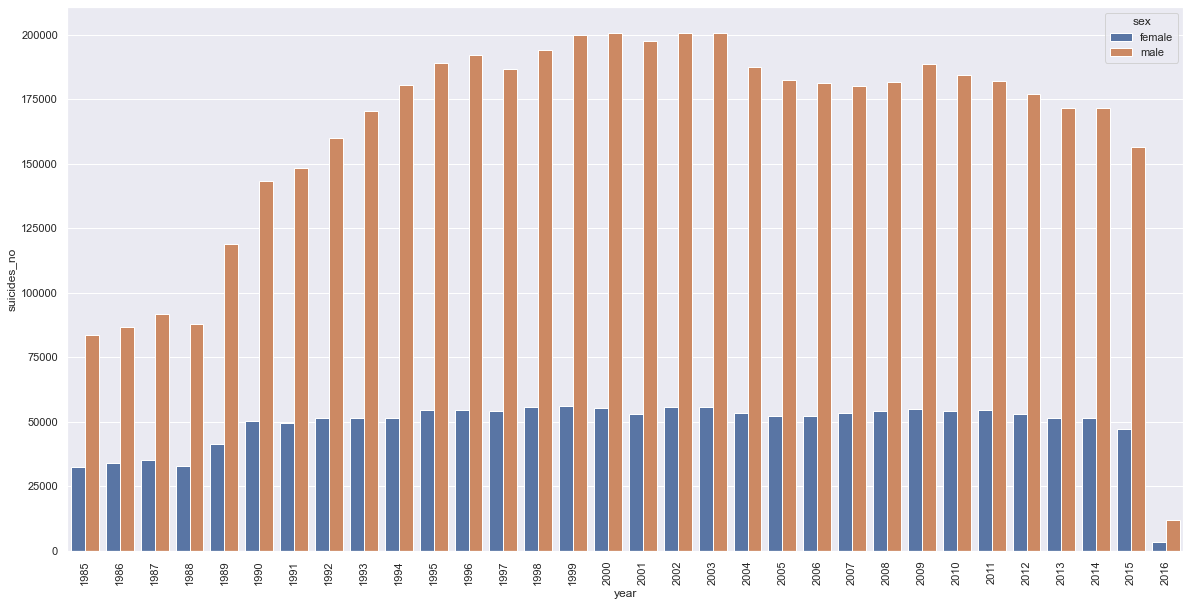

In [92]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(x='year', y='suicides_no',hue='sex' ,data=s)

#### Observations
##### The male suicides for all the years from 1985 to 2016 were very high as compared to female suicides

<br>

### Age vs Suicide Number

In [483]:
AS = df.groupby('age')['suicides_no'].sum().reset_index().sort_values('suicides_no', ascending=False)
AS

,age,suicides_no
2,35-54 years,2452141
4,55-74 years,1658443
1,25-34 years,1123912
0,15-24 years,808542
5,75+ years,653118
3,5-14 years,52264


<AxesSubplot:xlabel='age', ylabel='suicides_no'>

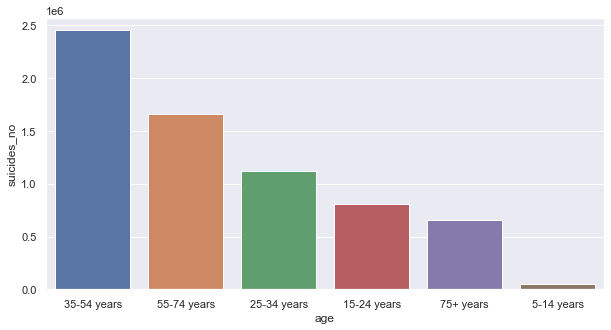

In [484]:
plt.figure(figsize=(10,5))
sns.barplot(x='age', y='suicides_no',data=AS)

#### Observations:
##### Maximum suicides were done for the ages of 35-54 years followed by 55-74 years

<br>

### Age vs Gender vs Suicide Number

In [101]:
df['age'].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [481]:
z = df.groupby(['age','sex'])['suicides_no'].sum().reset_index(name = 'Total Suicides').sort_values('Total Suicides', ascending=False)
z

,age,sex,Total Suicides
5,35-54 years,male,1945908
9,55-74 years,male,1228407
3,25-34 years,male,915089
1,15-24 years,male,633105
4,35-54 years,female,506233
11,75+ years,male,431134
8,55-74 years,female,430036
10,75+ years,female,221984
2,25-34 years,female,208823
0,15-24 years,female,175437


<AxesSubplot:xlabel='age', ylabel='Total Suicides'>

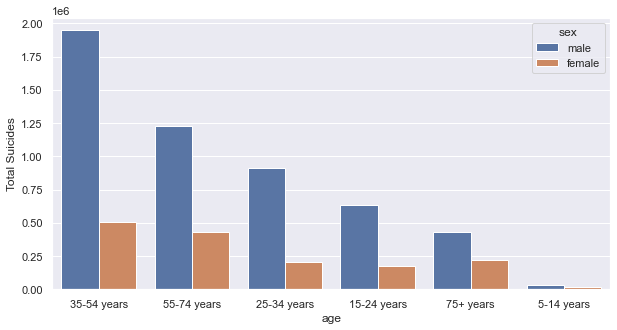

In [482]:
plt.figure(figsize=(10,5))
sns.barplot(x='age', y='Total Suicides', data=z, hue='sex')

#### Observation:
##### Most of the suicides were done with age varying from 35-54 years and those were also highest among males as compared to females

<br>


### Population vs Country vs Suicide Number

In [208]:
PCS = df.groupby('country')['population','suicides_no'].sum().reset_index().sort_values('suicides_no', ascending=False)
PCS_15 = CPS.head(15)
PCS_15

C:\Users\HUZAIF~1\AppData\Local\Temp/ipykernel_22784/1301070045.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  PCS = df.groupby('country')['population','suicides_no'].sum().reset_index().sort_values('suicides_no', ascending=False)


,country,population,suicides_no
75,Russian Federation,3690802620,1209742
98,United States,8054027201,1034013
46,Japan,3681024844,806902
33,France,1670756775,329127
95,Ukraine,1286469184,319950
35,Germany,2024875612,291262
73,Republic of Korea,1354944936,261730
15,Brazil,4856093548,226613
69,Poland,866180029,139098
97,United Kingdom,1738767780,136805


In [209]:
PCS_15['suicides_no'] = (PCS['suicides_no'])/1000
PCS_15['population'] = (PCS['population'])/1500000
PCS_15

C:\Users\HUZAIF~1\AppData\Local\Temp/ipykernel_22784/24587673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCS_15['suicides_no'] = (PCS['suicides_no'])/1000
C:\Users\HUZAIF~1\AppData\Local\Temp/ipykernel_22784/24587673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCS_15['population'] = (PCS['population'])/1500000


,country,population,suicides_no
75,Russian Federation,2460.535080,1209.742
98,United States,5369.351467,1034.013
46,Japan,2454.016563,806.902
33,France,1113.837850,329.127
95,Ukraine,857.646123,319.950
35,Germany,1349.917075,291.262
73,Republic of Korea,903.296624,261.730
15,Brazil,3237.395699,226.613
69,Poland,577.453353,139.098
97,United Kingdom,1159.178520,136.805


C:\Users\HUZAIF~1\AppData\Local\Temp/ipykernel_22784/2774332925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCS_15['color'] = PCS_15['country'].map(colors)


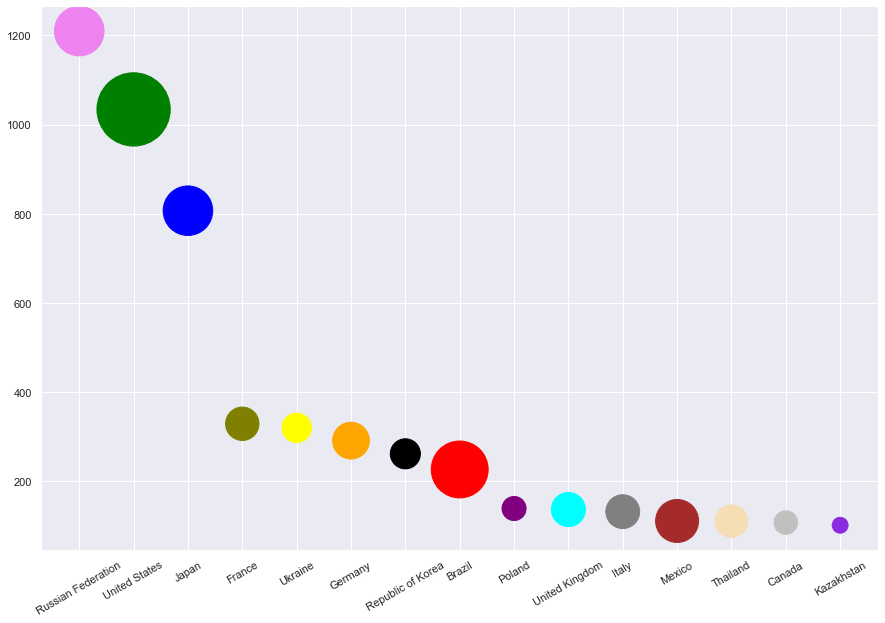

In [295]:
colors = {'Russian Federation':'violet', 'United States':'green', 'Japan':'blue', 'France':'olive','Ukraine':'yellow','Germany': 'orange', 'Republic of Korea':'black', 'Brazil':'red', 'Poland':'purple', 'United Kingdom':'aqua', 'Italy':'grey', 'Mexico':'brown', 'Thailand':'wheat', 'Canada':'silver', 'Kazakhstan':'blueviolet'}
PCS_15['color'] = PCS_15['country'].map(colors)
plt.figure(figsize=(15,10))
plt.xticks(rotation = 30)
plt.scatter(PCS_15['country'], PCS_15['suicides_no'], s=PCS_15['population'], c=PCS_15['color'])



#### Observations:
##### Russian Federation has the highest suicide rate whereas its population is less than US. US has highest population but its suicides are less than Russian Federation
##### Brazil has a relatively high population but its suicides are even less than Korea, France and Germany

<br>

### GDP per capita vs Population vs Country vs Suicides Number

In [303]:
GPCS = df.groupby('country')['population','suicides_no','gdp_per_capita ($)'].sum().reset_index().sort_values('suicides_no', ascending=False)
GPCS_15 = GPCS.head(15)
GPCS_15

C:\Users\HUZAIF~1\AppData\Local\Temp/ipykernel_22784/2296101592.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  GPCS = df.groupby('country')['population','suicides_no','gdp_per_capita ($)'].sum().reset_index().sort_values('suicides_no', ascending=False)


,country,population,suicides_no,gdp_per_capita ($)
75,Russian Federation,3690802620,1209742,2112096
98,United States,8054027201,1034013,14608296
46,Japan,3681024844,806902,13539888
33,France,1670756775,329127,11333328
95,Ukraine,1286469184,319950,627492
35,Germany,2024875612,291262,10971240
73,Republic of Korea,1354944936,261730,5506068
15,Brazil,4856093548,226613,2266032
69,Poland,866180029,139098,2346180
97,United Kingdom,1738767780,136805,11869908


In [304]:
GPCS_15['suicides_no'] = (GPCS['suicides_no'])/1000
GPCS_15['population'] = (GPCS['population'])/9900000
#GPCS_15['gdp_per_capita ($)'] = (GPCS_15['gdp_per_capita ($)'])/1000 
GPCS_15

C:\Users\HUZAIF~1\AppData\Local\Temp/ipykernel_22784/710737497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPCS_15['suicides_no'] = (GPCS['suicides_no'])/1000
C:\Users\HUZAIF~1\AppData\Local\Temp/ipykernel_22784/710737497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPCS_15['population'] = (GPCS['population'])/9900000


,country,population,suicides_no,gdp_per_capita ($)
75,Russian Federation,372.808345,1209.742,2112096
98,United States,813.538101,1034.013,14608296
46,Japan,371.820691,806.902,13539888
33,France,168.763311,329.127,11333328
95,Ukraine,129.946382,319.950,627492
35,Germany,204.532890,291.262,10971240
73,Republic of Korea,136.863125,261.730,5506068
15,Brazil,490.514500,226.613,2266032
69,Poland,87.492932,139.098,2346180
97,United Kingdom,175.633109,136.805,11869908


C:\Users\HUZAIF~1\AppData\Local\Temp/ipykernel_22784/3934732768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPCS_15['color'] = GPCS_15['country'].map(colors)


Text(13000000, 760, 'Japan')

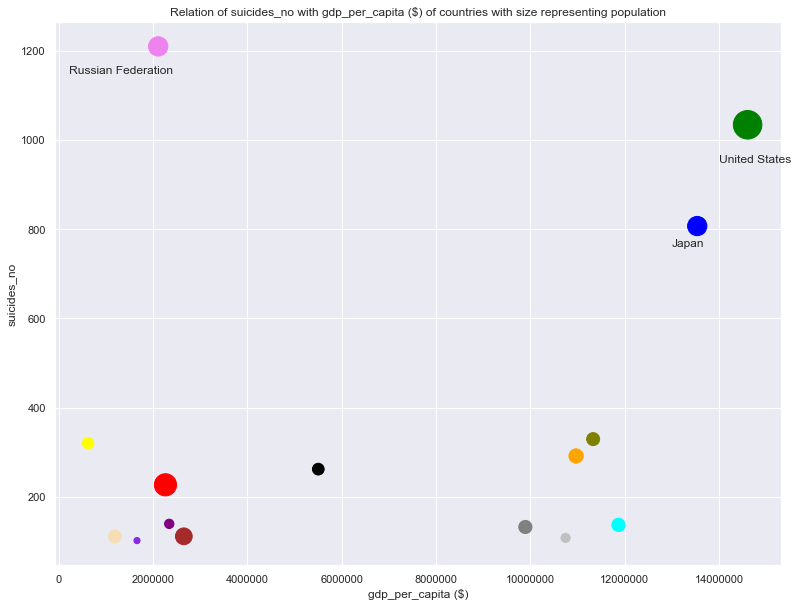

In [347]:
plt.figure(figsize=(13,10))
GPCS_15['color'] = GPCS_15['country'].map(colors)
plt.scatter(GPCS_15['gdp_per_capita ($)'], GPCS_15['suicides_no'], s=GPCS_15['population'], c=GPCS_15['color'])
plt.xticks([0,2000000,4000000, 6000000, 8000000, 10000000, 12000000, 14000000], [0,2000000,4000000, 6000000, 8000000, 10000000, 12000000, 14000000])
plt.xlabel('gdp_per_capita ($)')
plt.ylabel('suicides_no')
plt.title('Relation of suicides_no with gdp_per_capita ($) of countries with size representing population')
plt.text(222229,1150,'Russian Federation')
plt.text(14000000,950,'United States')
plt.text(13000000,760,'Japan')


#### Observations:
##### GDP per Capita of Russian Federation is very low as comapred to even small countries like UK, Japan, Canada Italy but has a high number of suicide rates
##### US has the highest GDP per capita but its suicides are on 2nd number afer Russian Federation

<br>

### Generation vs Suicide Number

In [353]:
GS = df.groupby('generation')['suicides_no'].sum().reset_index().sort_values('suicides_no', ascending=False)
GS

,generation,suicides_no
0,Boomers,2284498
5,Silent,1781744
2,Generation X,1532804
4,Millenials,623459
1,G.I. Generation,510009
3,Generation Z,15906


<AxesSubplot:xlabel='generation', ylabel='suicides_no'>

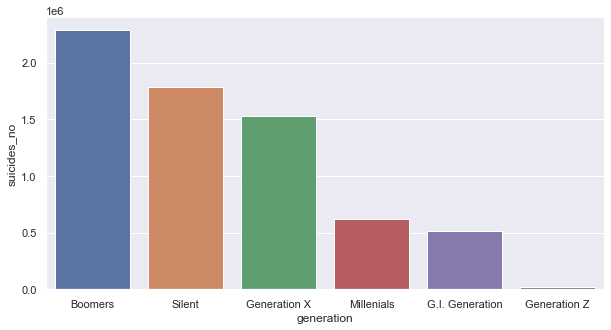

In [357]:
plt.figure(figsize=(10,5))
sns.barplot(x='generation', y='suicides_no', data=GS)


#### Observations:
##### Generation Boomers has the highest Suicide whereas Generation Z has the lowest

<br>

### Generation vs Gender vs Suicide Number

In [358]:
GGS = df.groupby(['generation','sex'])['suicides_no'].sum().reset_index().sort_values('suicides_no', ascending=False)
GGS

,generation,sex,suicides_no
1,Boomers,male,1823530
11,Silent,male,1309455
5,Generation X,male,1222965
9,Millenials,male,489839
10,Silent,female,472289
0,Boomers,female,460968
3,G.I. Generation,male,333356
4,Generation X,female,309839
2,G.I. Generation,female,176653
8,Millenials,female,133620


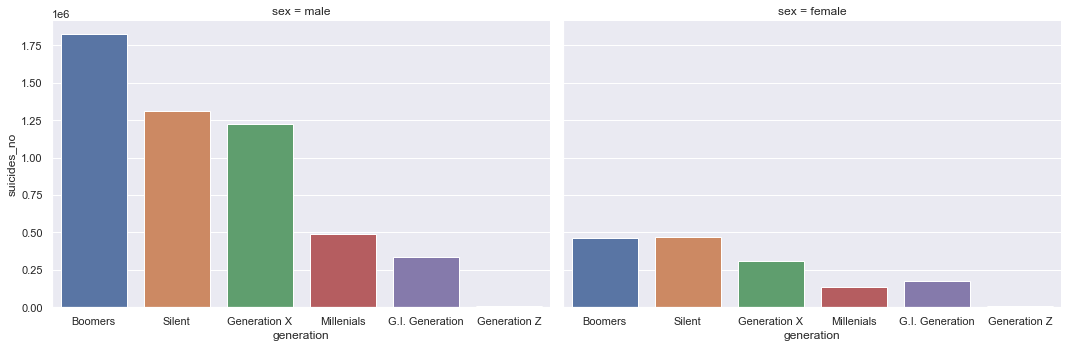

In [366]:

sns.catplot(x='generation',y='suicides_no', data=GGS, kind='bar', col='sex', aspect=1.5)

#### Observations:
##### For males, Boomers have highest suicides whereas for females, Silent has the highest suicides

<br>


### Country vs Age vs Gender vs Suicide Number

In [485]:
CGAS = df.groupby(['country','sex','age'])['suicides_no'].sum().reset_index(name='Total Suicides').sort_values('Total Suicides',ascending=False)
CGAS

,country,sex,age,Total Suicides
906,Russian Federation,male,35-54 years,414090
1182,United States,male,35-54 years,289345
560,Japan,male,35-54 years,209755
908,Russian Federation,male,55-74 years,205284
905,Russian Federation,male,25-34 years,204787
...,...,...,...,...
334,Dominica,male,55-74 years,0
101,Bahamas,female,75+ years,0
335,Dominica,male,75+ years,0
910,Saint Kitts and Nevis,female,15-24 years,0


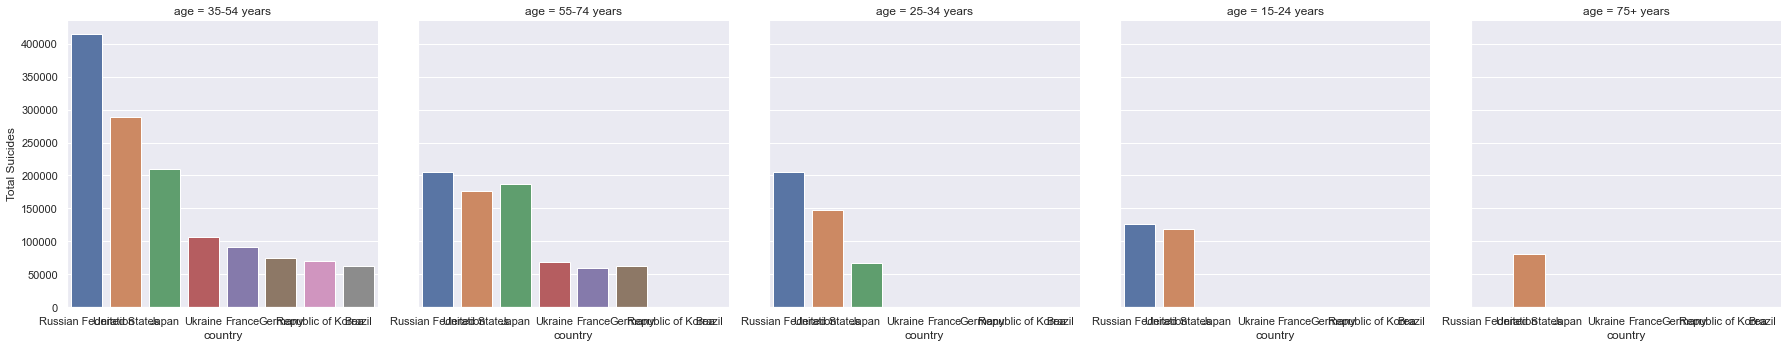

In [486]:
Male_CGAS = CGAS[CGAS['sex']=='male']
sns.catplot(data=Male_CGAS.head(20),x='country', y='Total Suicides', col='age', kind='bar' )

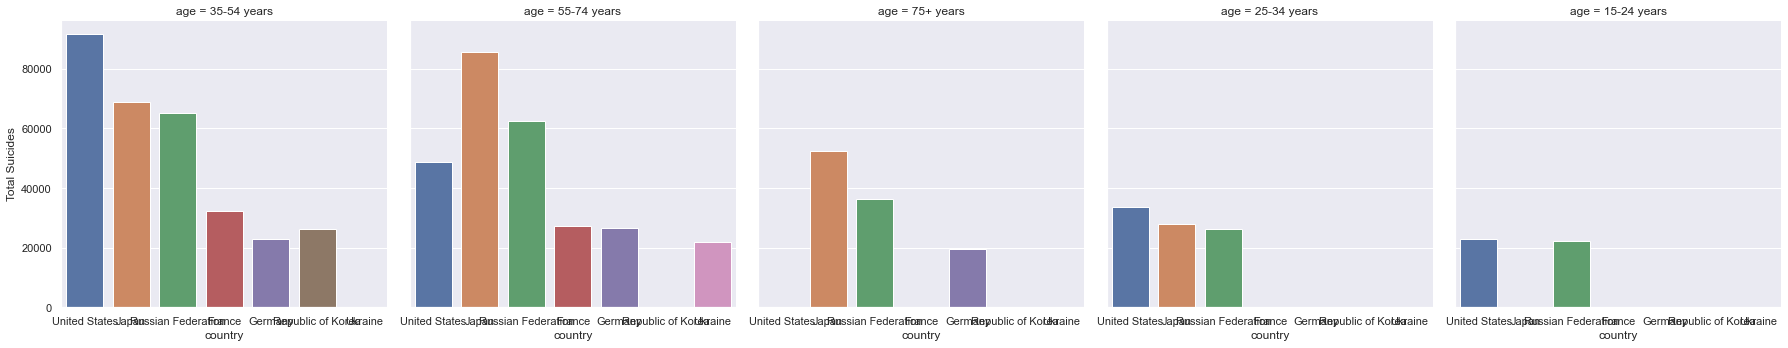

In [487]:
Female_CGAS = CGAS[CGAS['sex']=='female']
sns.catplot(data=Female_CGAS.head(20),x='country', y='Total Suicides', col='age', kind='bar' )

#### Observations:
##### For highest male suicides 
- For age 35-54 years, Russian Federation has the highest male suicides
- For age 55-74 years, Russian Federation, US and Japan has approx equal suicide rates with Russian Federation leading with a little margin
- For age 25-34 years, Russian Federation has the highest male suicides
- For age 15-24 years, Russian Federation and US has approx equal suicide rates with Russian Federation leading with a little margin
- For age 75+ years, US is leading with a great margin

##### For highest female suicides 
- For age 35-54 years, US has the highest male suicides
- For age 55-74 years, Japan is leading with highest suicide rates in female followed by Russian Federation
- for age 25-34 years, US, Russian Federation and Japan have approx equal suicides with US leading with a little margin
- For age 15-24 years, US is leading Russian Federation with Japan having really low Suicides
- For age 75+ years, Japan is leading followed by Russian Federation with US having really low suicides

# Final Observations

- Large proportion of the suicides were done by males from 1987 to 2016


- Russian Federation stands at number 1 with highest number of suicides over the years followed by United States and Japan


- Russian Federation stands at number 1 with highest male suicides whereas Japan stands at number 1 with highest female suicides over the years


- Suicides started increasing after the year 1990 and decreased at year 2016


- We already know that suicide rates decreased relatively high in 2016 which were already high in 2015. Further analysis shows that the female suicides decreased a lot in 2016. Russian Federation, USA and Japan also had very low suicide rates for both male and female in 2016


- The male suicides for all the years from 1985 to 2016 were very high as compared to female suicides


- Maximum suicides were done for the ages of 35-54 years followed by 55-74 years


- Most of the suicides were done with age varying from 35-54 years and those were also highest among males as compared to females


- Russian Federation has the highest suicide rate whereas its population is less than US. US has highest population but its suicides are less than Russian Federation. Brazil has a relatively high population but its suicides are even less than Korea, France and Germany


- GDP per Capita of Russian Federation is very low as comapred to even small countries like UK, Japan, Canada Italy but has a high number of suicide rates. US has the highest GDP per capita but its suicides are on 2nd number afer Russian Federation


- Generation Boomers has the highest Suicide whereas Generation Z has the lowest


- For males, Boomers have highest suicides whereas for females, Silent has the highest suicides


- For highest male suicides
    - For age 35-54 years, Russian Federation has the highest male suicides
    - For age 55-74 years, Russian Federation, US and Japan has approx equal suicide rates with Russian Federation leading with a little margin
    - For age 25-34 years, Russian Federation has the highest male suicides
    - For age 15-24 years, Russian Federation and US has approx equal suicide rates with Russian Federation leading with a little margin
    - For age 75+ years, US is leading with a great margin
- For highest female suicides
    - For age 35-54 years, US has the highest male suicides
    - For age 55-74 years, Japan is leading with highest suicide rates in female followed by Russian Federation
    - For age 25-34 years, US, Russian Federation and Japan have approx equal suicides with US leading with a little margin
    - For age 15-24 years, US is leading Russian Federation with Japan having really low Suicides
    - For age 75+ years, Japan is leading followed by Russian Federation with US having really low suicides